# Importing Libraries and Loading Data

In [1]:
# Importing All Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
#Loading Datasets
pd.set_option('display.max_columns',10,'display.width',1000)
train = pd.read_csv('./Titanic´s Bbdd/train.csv')
test = pd.read_csv('./Titanic´s Bbdd/test.csv')

#  Descriptive Statistics and Initial Analysis

In [3]:
# Grouping by survival status and calculating means for numeric columns only
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
print(train.groupby('Survived')[numeric_cols].mean())

          PassengerId  Survived    Pclass        Age     SibSp     Parch       Fare
Survived                                                                           
0          447.016393       0.0  2.531876  30.626179  0.553734  0.329690  22.117887
1          444.368421       1.0  1.950292  28.343690  0.473684  0.464912  48.395408


#  Descriptive Statistics and Initial Analysis

In [4]:
# Grouping by survival status and calculating means for numeric columns only
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
print(train.groupby('Survived')[numeric_cols].mean())

          PassengerId  Survived    Pclass        Age     SibSp     Parch       Fare
Survived                                                                           
0          447.016393       0.0  2.531876  30.626179  0.553734  0.329690  22.117887
1          444.368421       1.0  1.950292  28.343690  0.473684  0.464912  48.395408


# Gender Analysis and Visualization

In [5]:
# Count of males and females on board
male_count = train[train['Sex'] == 'male'].shape[0]
female_count = train[train['Sex'] == 'female'].shape[0]

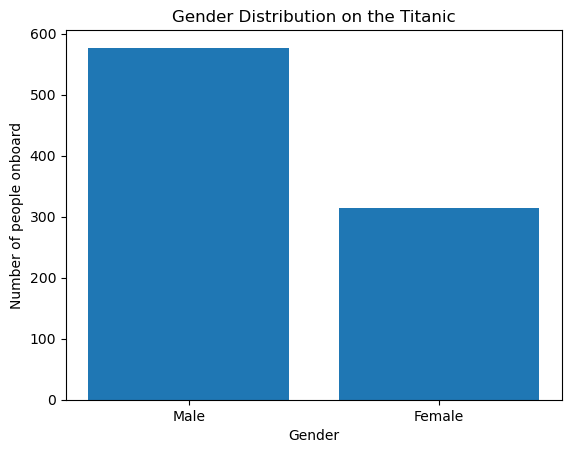

In [6]:
# Plotting the gender distribution
fig, ax = plt.subplots()
ax.bar(['Male', 'Female'], [male_count, female_count])
plt.xlabel("Gender")
plt.ylabel("Number of people onboard")
plt.title("Gender Distribution on the Titanic")
plt.show()

In [7]:
# Survival statistics by gender
print(train.groupby('Sex')[['Survived']].mean())

        Survived
Sex             
female  0.742038
male    0.188908


In [8]:
# Plotting the survival status
survived_count = train[train['Survived'] == 1].shape[0]
not_survived_count = train[train['Survived'] == 0].shape[0]

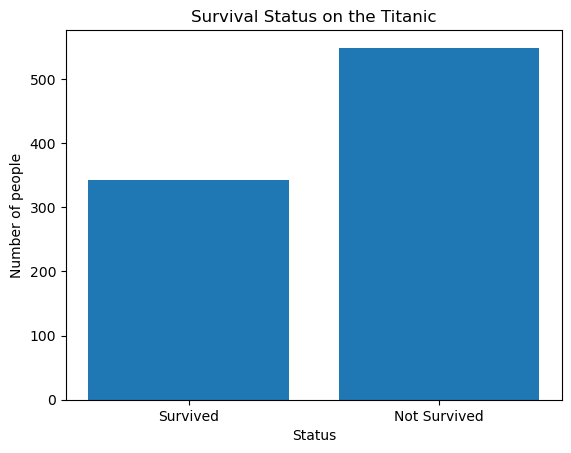

In [9]:
fig, ax = plt.subplots()
ax.bar(['Survived', 'Not Survived'], [survived_count, not_survived_count])
plt.xlabel("Status")
plt.ylabel("Number of people")
plt.title("Survival Status on the Titanic")
plt.show()


# Class and Age Analysis

Text(0.5, 1.0, 'Non-Survival by Ticket Class')

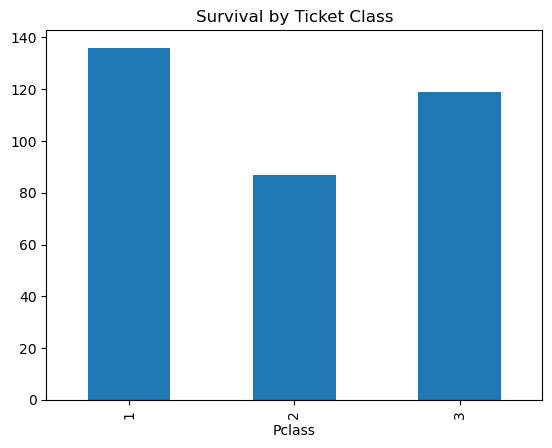

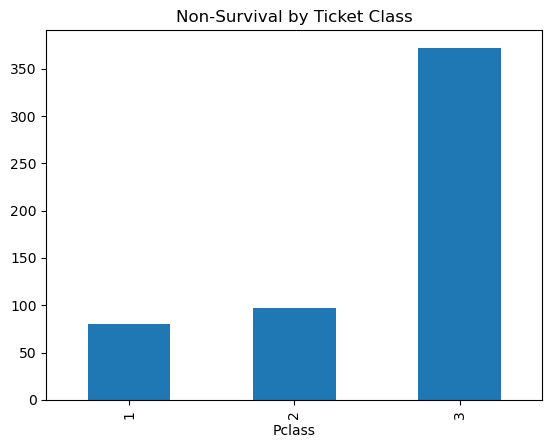

In [10]:
# Plotting survival by class
plt.figure()
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Survival by Ticket Class')

plt.figure()
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Non-Survival by Ticket Class')

Text(0.5, 0, 'Age')

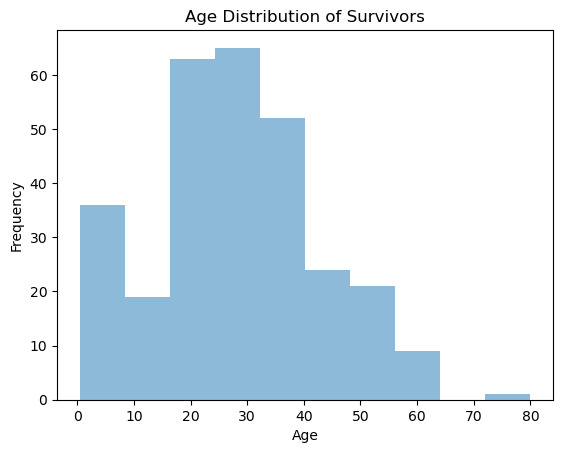

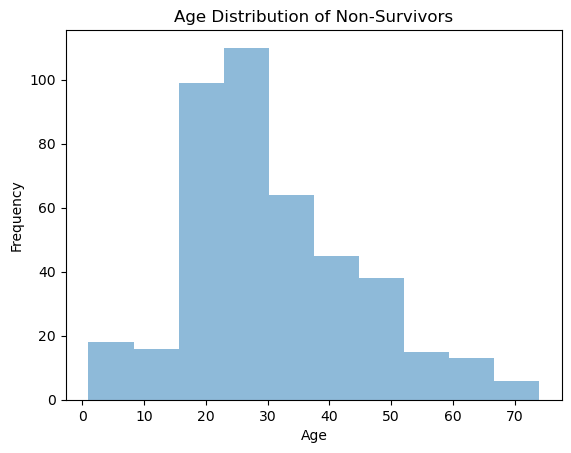

In [11]:
# Age distribution of survivors vs non-survivors
plt.figure()
train.loc[train['Survived'] == 1, 'Age'].plot.hist(bins=10, alpha=0.5)
plt.title('Age Distribution of Survivors')
plt.xlabel('Age')

plt.figure()
train.loc[train['Survived'] == 0, 'Age'].plot.hist(bins=10, alpha=0.5)
plt.title('Age Distribution of Non-Survivors')
plt.xlabel('Age')

# SibSp, Pclass, Age, and Embarked Analysis

In [12]:
# Survival rates by number of siblings/spouses
print(train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [13]:
# Survival rates by class
print(train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [14]:
# Survival rates by age
print(train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True))

      Age  Survived
0    0.42       1.0
1    0.67       1.0
2    0.75       1.0
3    0.83       1.0
4    0.92       1.0
..    ...       ...
83  70.00       0.0
84  70.50       0.0
85  71.00       0.0
86  74.00       0.0
87  80.00       1.0

[88 rows x 2 columns]


In [15]:
# Survival rates by embarkation point
print(train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


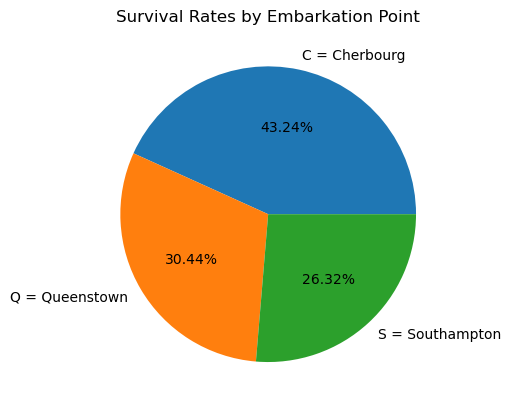

In [16]:
# Plotting survival rates by embarkation point
fig, ax = plt.subplots()
ax.pie(train.groupby('Embarked')['Survived'].mean(), labels=['C = Cherbourg', 'Q = Queenstown', 'S = Southampton'], autopct='%1.2f%%')
plt.title('Survival Rates by Embarkation Point')
plt.show()

# Data Preprocessing

In [17]:
# Dropping useless columns
train = train.drop(['Ticket', 'Cabin', 'Name'], axis=1)
test = test.drop(['Ticket', 'Cabin', 'Name'], axis=1)

In [18]:
# Feature selection
features = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']
X = train[features]
y = train['Survived']

In [19]:
# Handling missing values
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Embarked'] = X['Embarked'].fillna(method='pad')

In [20]:
# Converting categorical variables to numeric
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X['Embarked'] = X['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [21]:
# Handling missing values in test set
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['Embarked'] = test['Embarked'].fillna(method='pad')

In [22]:
# Converting categorical variables to numeric in test set
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [23]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Model Training and Evaluation

In [24]:
# Model training and evaluation function
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {accuracy}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return model


In [25]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
logistic_model = train_evaluate_model(LogisticRegression(), X_train, y_train, X_test, y_test)

Accuracy Score: 0.7574626865671642
[[130  26]
 [ 39  73]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       156
           1       0.74      0.65      0.69       112

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.75       268
weighted avg       0.76      0.76      0.75       268



In [26]:
# Using Support Vector Machine
from sklearn.svm import SVC
svc_model = train_evaluate_model(SVC(), X_train, y_train, X_test, y_test)

Accuracy Score: 0.6604477611940298
[[149   7]
 [ 84  28]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       156
           1       0.80      0.25      0.38       112

    accuracy                           0.66       268
   macro avg       0.72      0.60      0.57       268
weighted avg       0.71      0.66      0.61       268



In [27]:
# Using K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_model = train_evaluate_model(KNeighborsClassifier(n_neighbors=5), X_train, y_train, X_test, y_test)

Accuracy Score: 0.6567164179104478
[[126  30]
 [ 62  50]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       156
           1       0.62      0.45      0.52       112

    accuracy                           0.66       268
   macro avg       0.65      0.63      0.63       268
weighted avg       0.65      0.66      0.64       268



In [28]:
# Using Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = train_evaluate_model(GaussianNB(), X_train, y_train, X_test, y_test)

Accuracy Score: 0.7686567164179104
[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [29]:
# Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = train_evaluate_model(DecisionTreeClassifier(criterion='entropy', random_state=7), X_train, y_train, X_test, y_test)

Accuracy Score: 0.7425373134328358
[[132  24]
 [ 45  67]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       156
           1       0.74      0.60      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268



# Summarizing Results

In [30]:
# Summarizing the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 'Naive Bayes', 'Decision Tree'],
    'Score': [0.75, 0.66, 0.66, 0.77, 0.74]
})

results = results.sort_values(by='Score', ascending=False).set_index('Score')
print(results)

                        Model
Score                        
0.77              Naive Bayes
0.75      Logistic Regression
0.74            Decision Tree
0.66   Support Vector Machine
0.66      K-Nearest Neighbors


# Generating Predictions and Explaining Results

In [31]:
# Choosing the best model (Naive Bayes in this case) for predictions
best_model = nb_model

In [32]:
# Making predictions on the test set
predictions = best_model.predict(test[features])

In [33]:
# Creating a DataFrame with the predictions
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})

In [34]:
# Saving the results to a CSV file
submission.to_csv("titanic_predictions.csv", index=False)

In [36]:
# Creating the report content
report_content = f"""
Comprehensive Analysis and Prediction of Titanic Passengers' Survival Using Machine Learning

1. Descriptive Statistics and Initial Analysis:
   - The data was grouped by survival status and mean values for numeric columns were calculated.
   - Analysis showed differences in average age, fare, and class between survivors and non-survivors.

2. Gender Analysis:
   - Male passengers: {male_count}
   - Female passengers: {female_count}
   - Survival rate for females: {train.groupby('Sex')[['Survived']].mean().loc['female'][0]:.2f}
   - Survival rate for males: {train.groupby('Sex')[['Survived']].mean().loc['male'][0]:.2f}

3. Class and Age Analysis:
   - Survival rates varied significantly by class and age.
   - Higher survival rates were observed in higher classes and among younger passengers.

4. SibSp, Pclass, Age, and Embarked Analysis:
   - Analysis of survival rates based on number of siblings/spouses, class, age, and embarkation point.
   - Notable differences in survival rates based on these factors.

5. Model Training and Evaluation:
   - Logistic Regression Accuracy: {accuracy_score(y_test, logistic_model.predict(X_test)):.2f}
   - SVM Accuracy: {accuracy_score(y_test, svc_model.predict(X_test)):.2f}
   - K-Nearest Neighbors Accuracy: {accuracy_score(y_test, knn_model.predict(X_test)):.2f}
   - Naive Bayes Accuracy: {accuracy_score(y_test, nb_model.predict(X_test)):.2f}
   - Decision Tree Accuracy: {accuracy_score(y_test, dt_model.predict(X_test)):.2f}

Conclusion:
   - The Naive Bayes model was chosen as the best model based on its accuracy score of {accuracy_score(y_test, nb_model.predict(X_test)):.2f}.
   - This model was used to predict the survival of passengers in the test dataset.
"""

# Writing the report to a text file
with open("titanic_social_network_report.txt", "w") as file:
    file.write(report_content)


In [37]:
# Explaining the results
print("\nExplanation of Results:")
print("The Naive Bayes model was chosen as the best model based on its accuracy score.")
print("The model was used to predict the survival of passengers in the test dataset.")


Explanation of Results:
The Naive Bayes model was chosen as the best model based on its accuracy score.
The model was used to predict the survival of passengers in the test dataset.
